# Binarization

쓰레쉬 홀드를 사용.

```cv2.threshold(src, thresh, maxval, type, dst=None)```

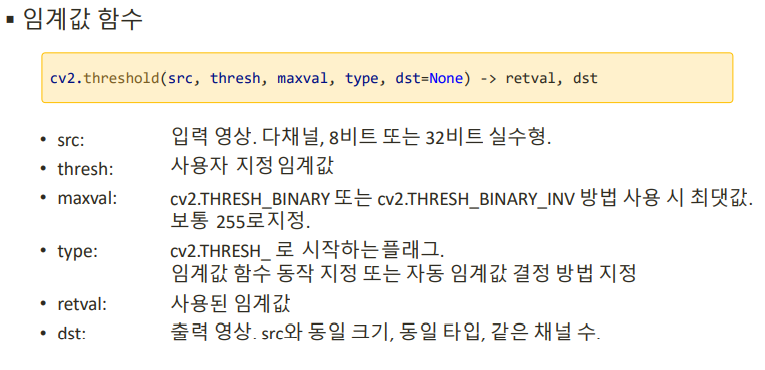

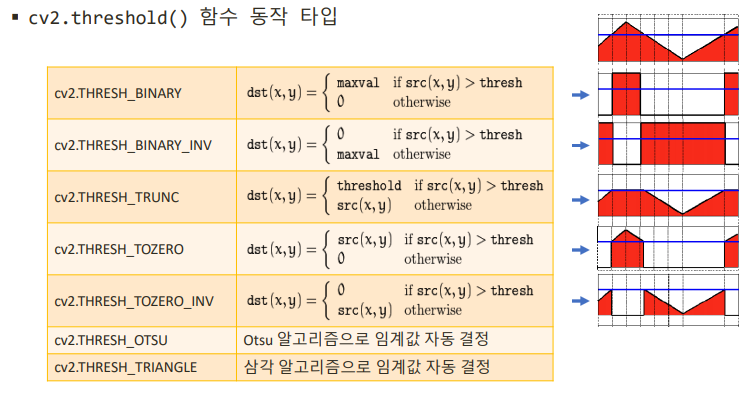

In [1]:
import sys
import numpy as np
import cv2

In [2]:
src = cv2.imread('cells.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [3]:
_, dst1 = cv2.threshold(src, 100, 255, cv2.THRESH_BINARY) # 임계값 : 100
_, dst2 = cv2.threshold(src, 210, 255, cv2.THRESH_BINARY) # 임계값 : 210

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


with Trackbar **threshold 조정**

In [4]:
import sys
import numpy as np
import cv2

In [5]:
# EX 1)
src = cv2.imread('cells.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [6]:
def on_threshold(pos):
    # 쓰레쉬 홀드는 Trackbar의 위치로 부터 값을 받는다. # 초기값 128
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey()
cv2.destroyAllWindows()


In [24]:
# EX 2) => 조명 균일 X.
src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [25]:
cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey()
cv2.destroyAllWindows()

# Otsu

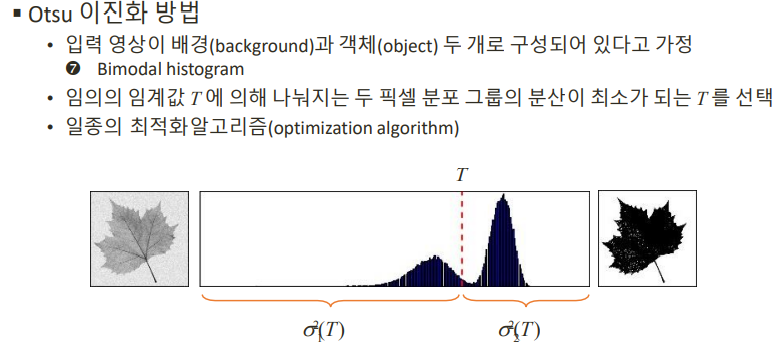

In [9]:
import sys
import numpy as np
import cv2

In [10]:
src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [11]:
# OTSU를 통해 threshold를 구하고 이를 기반으로 Binarization진행
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)# Extra Flag
# 기본은 THRESH_BINARY -> THRESH_OTSU는 추가 FLAG
# SAME WITH
# th, _ =  cv2.threshold(src, 0, 255,cv2.THRESH_OTSU)
# _, dst = cv2.threshold(src, th, 255, cv2.THRESH_BINARY)

print("otsu's threshold:", th)  # 131

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

otsu's threshold: 131.0


In [26]:
src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [27]:
# OTSU를 통해 threshold를 구하고 이를 기반으로 Binarization진행
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)# Extra Flag
# 기본은 THRESH_BINARY -> THRESH_OTSU는 추가 FLAG 
# SAME WITH
# th, _ =  cv2.threshold(src, 0, 255,cv2.THRESH_OTSU)
# _, dst = cv2.threshold(src, th, 255, cv2.THRESH_BINARY)

print("otsu's threshold:", th)  # 131

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

otsu's threshold: 97.0


# Local Binarization

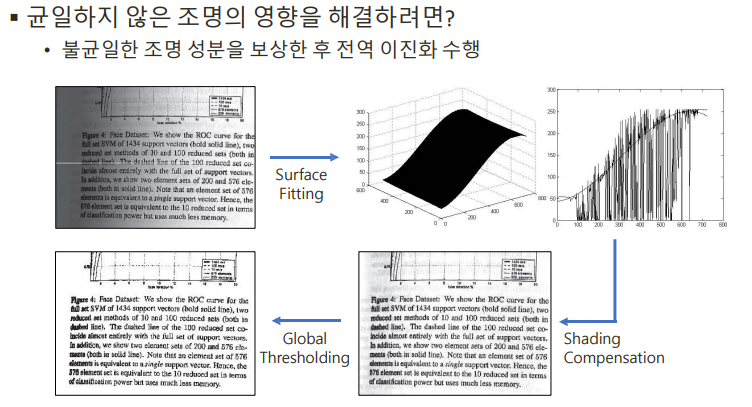

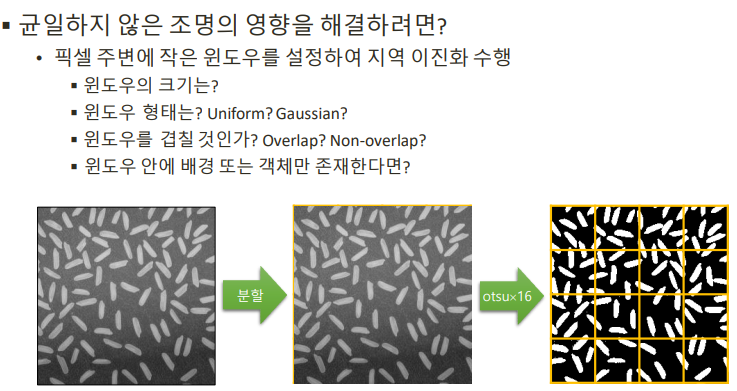

In [14]:
import sys
import numpy as np
import cv2

## Rice

In [15]:
# 입력 영상 불러오기
src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [21]:
# 전역 이진화 by Otsu's method
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)# Extra Flag
# 기본은 THRESH_BINARY -> THRESH_OTSU는 추가 FLAG

# 지역 이진화 by Otsu's method
dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4 # => 몫 연산 정수형 반환
bh = src.shape[0] // 4 # => 몫 연산 정수형 반환
print(src.shape)
print(bw, bh)
# 4 x 4 => 16개 블럭마다 threshold를 통해 이진화 진행. 
for y in range(4): 
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        # => 이 때 threshold값은 otsu가 결정
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)# Extra Flag
# 기본은 THRESH_BINARY -> THRESH_OTSU는 추가 FLAG

# 결과 출력
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


(563, 558)
139 140


## SUDOKU

In [28]:
# 입력 영상 불러오기
src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [29]:
# 전역 이진화 by Otsu's method
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)# Extra Flag
# 기본은 THRESH_BINARY -> THRESH_OTSU는 추가 FLAG

# 지역 이진화 by Otsu's method
dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw] # 
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)# Extra Flag
# 기본은 THRESH_BINARY -> THRESH_OTSU는 추가 FLAG

# 결과 출력
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

## Adaptive Threshold

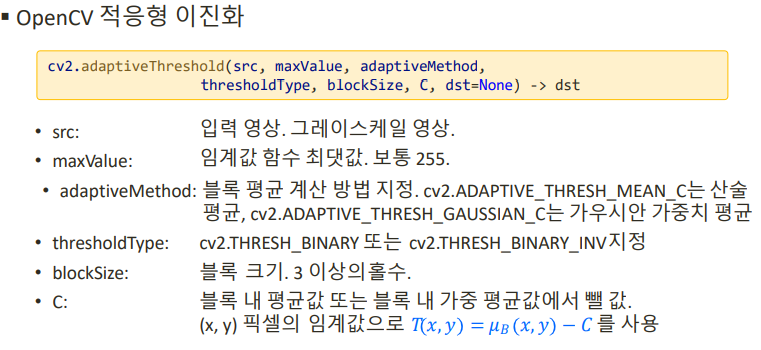

In [30]:
import sys
import numpy as np
import cv2

In [31]:
src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [32]:
def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0:
        bsize = bsize - 1
    if bsize < 3:
        bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [34]:
cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()

# Morphology Erosion & Dilation

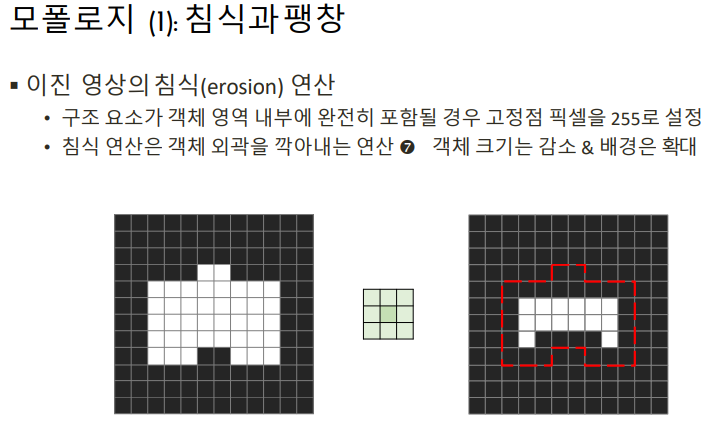

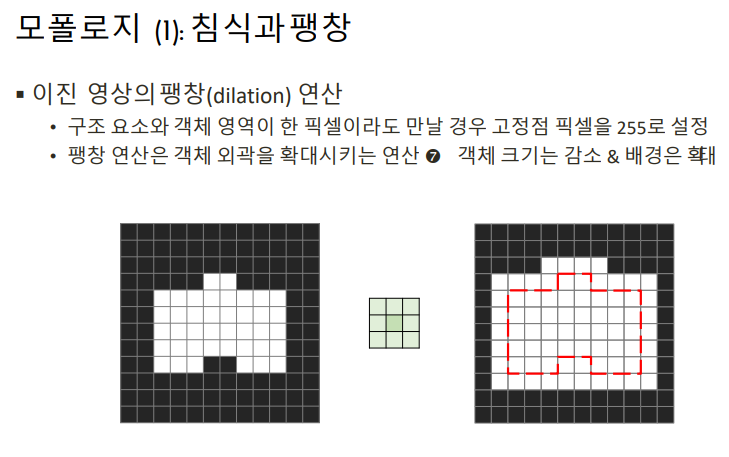

In [35]:
import sys
import numpy as np
import cv2


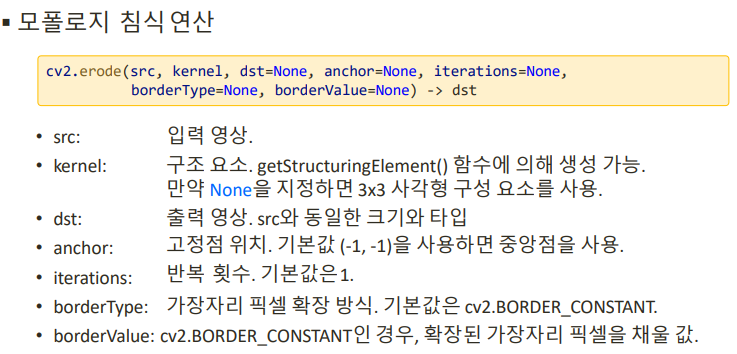

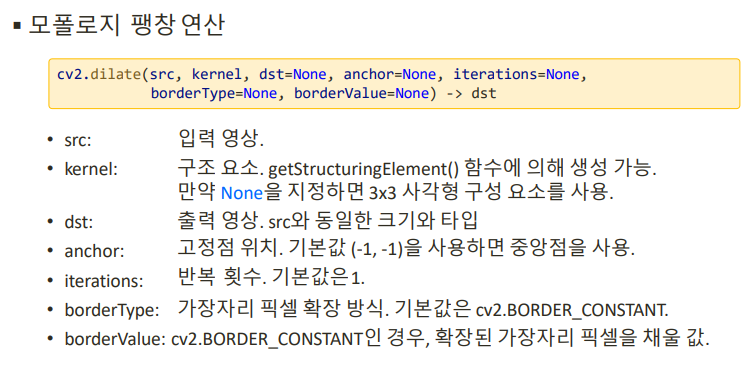

In [36]:
src = cv2.imread('circuit.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

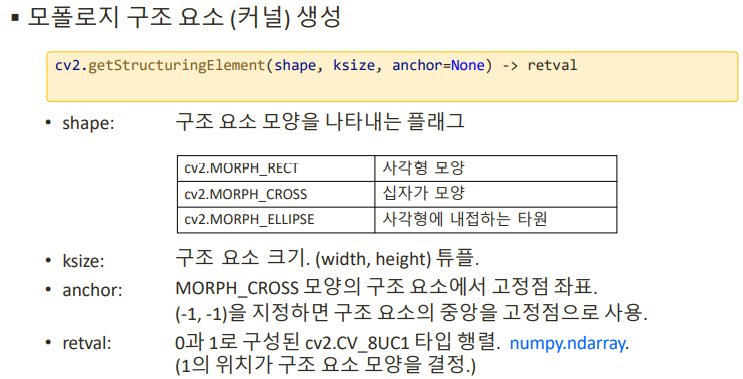

In [39]:
# 모폴로지 사각형 모양 커널 생성.
se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))

# 침식
dst1 = cv2.erode(src, se) 

# 팽창
dst2 = cv2.dilate(src, None) 

cv2.imshow('src', src)
cv2.imshow('dst1', dst1) # 침식
cv2.imshow('dst2', dst2) # 팽창
cv2.waitKey()
cv2.destroyAllWindows()

## RICE Local Binarization & Erosion - Dilate

In [43]:
# 입력 영상 불러오기
src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [44]:
# 전역 이진화 by Otsu's method
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 지역 이진화 by Otsu's method
dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4 # => 몫 연산 정수형 반환
bh = src.shape[0] // 4 # => 몫 연산 정수형 반환
print(src.shape)
print(bw, bh)

# 4 x 4 => 16개 블럭마다 threshold를 통해 이진화 진행. 
for y in range(4): 
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        # => 이 때 threshold값은 otsu가 결정
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

# 모폴로지 사각형 모양 커널 생성.
se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))

# 침식
dst3 = cv2.erode(dst2, se) 

# 팽창
dst4 = cv2.dilate(dst2, None) 

(512, 512)
128 128


In [45]:
# 결과 출력
cv2.imshow('src', src)
cv2.imshow('dst1_global_bin', dst1)
cv2.imshow('dst2_local_bin', dst2)
cv2.imshow('dst3_erosion', dst3)
cv2.imshow('dst4_dilation', dst4)
cv2.waitKey()
cv2.destroyAllWindows()

## SUDOKU Local Binarization with Adaptive & Erosion - Dilate

In [46]:
# 입력 영상 불러오기
src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [47]:
# 전역 이진화 by Otsu's method
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 지역 이진화 by Otsu's method
dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw] # 
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

# 모폴로지 사각형 모양 커널 생성.
se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))

# 침식
dst3 = cv2.erode(dst2, se) 

# 팽창
dst4 = cv2.dilate(dst2, None) 

In [48]:
# 결과 출력
cv2.imshow('src', src)
cv2.imshow('dst1_global_bin', dst1)
cv2.imshow('dst2_local_bin', dst2)
cv2.imshow('dst3_erosion', dst3)
cv2.imshow('dst4_dilation', dst4)
cv2.waitKey()
cv2.destroyAllWindows()

# Morphology Opening & Closing

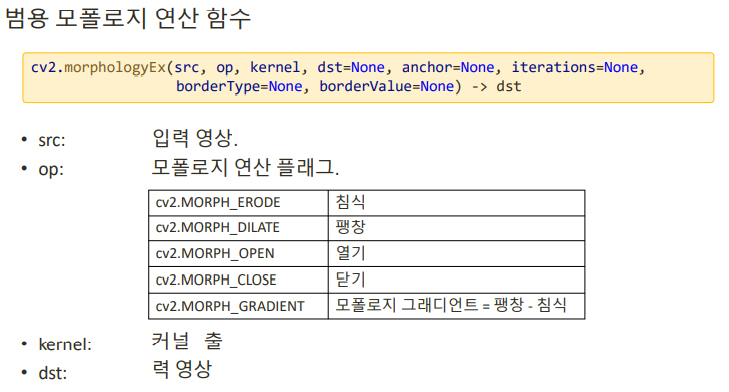

```cv2.morphologyEx(src, op, kernel, dst=None, anchor=None, iterations=None, 
borderType=None, borderValue=None) ```

**Opening : Erosion -> Dilation**

In [49]:
import sys
import numpy as np
import cv2

In [56]:
src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [57]:
# src 영상에 지역 이진화 수행 (local_th.py 참고)
dst1 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

In [58]:
# dst1:local binarization with OTSU의 쌀의 개수를 센다.
cnt1, _ = cv2.connectedComponents(dst1) #  레이블링 함수 - cv2.connectedComponents

print('cnt1:', cnt1)

dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)
# Same as
# dst2 = cv2.erode(dst1, None)
# dst2 = cv2.dilate(dst2, None)

# dst2: local binarization -> (erode -> dilate)(== opening)의 쌀의 개수를 센다.
cnt2, _ = cv2.connectedComponents(dst2) #  레이블링 함수 - cv2.connectedComponents
print('cnt2:', cnt2)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


cnt1: 113
cnt2: 99


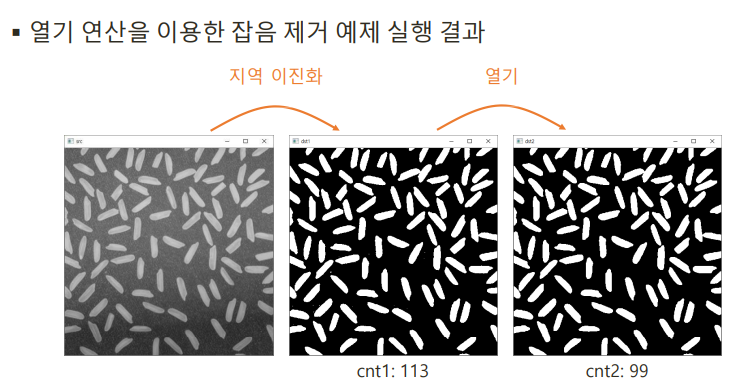

**Closing : Dilation -> Erosion**

In [53]:
src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [54]:
# src 영상에 지역 이진화 수행 (local_th.py 참고)
dst1 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

In [55]:
# dst1:local binarization with OTSU의 쌀의 개수를 센다.
cnt1, _ = cv2.connectedComponents(dst1) #  레이블링 함수 - cv2.connectedComponents

print('cnt1:', cnt1)

dst2 = cv2.morphologyEx(dst1, cv2.MORPH_CLOSE, None)
# Same as
# dst2 = cv2.dilate(dst1, None)
# dst2 = cv2.erode(dst2, None)

# dst2: local binarization -> (dilate -> erode)(== closing)의 쌀의 개수를 센다.

cnt2, _ = cv2.connectedComponents(dst2) #  레이블링 함수 - cv2.connectedComponents
print('cnt2:', cnt2)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()


cnt1: 113
cnt2: 109


# Labeling 레이블링

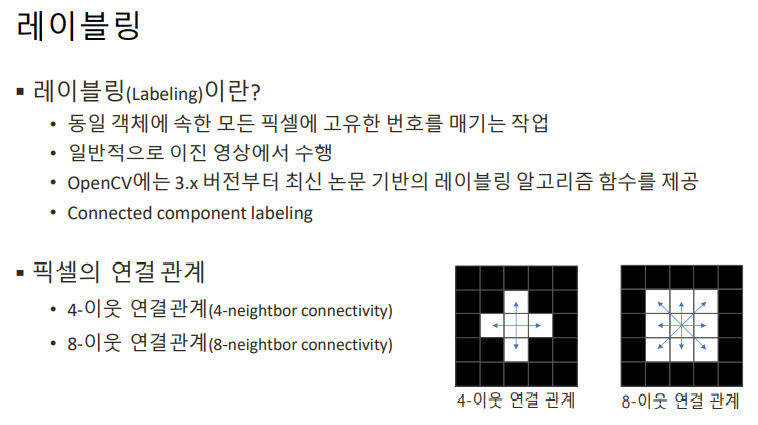

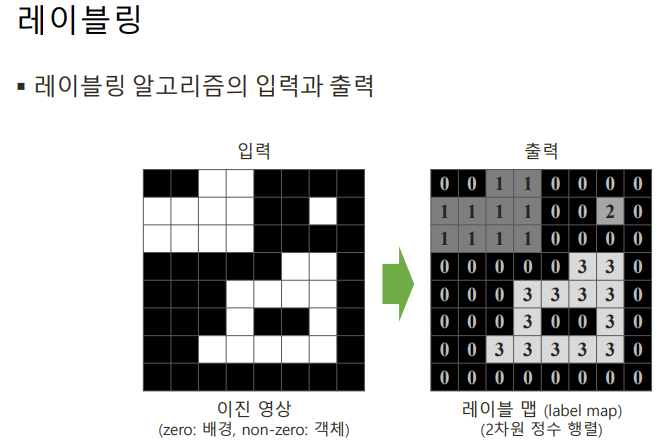

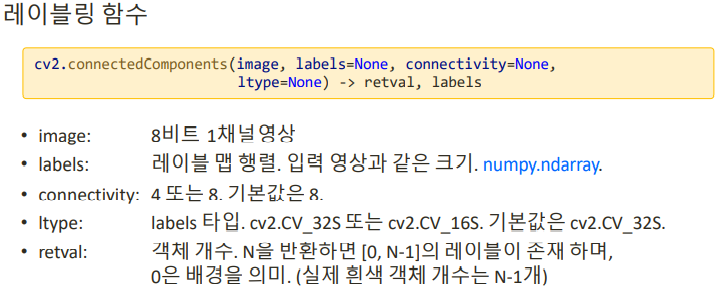

In [59]:
import sys
import numpy as np
import cv2

그룹에 대한 Labeling (대충 1이 몇 번째 그룹에 있는지를 찾아준다.)

In [60]:
mat = np.array([
    [0, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]], np.uint8)

cnt, labels = cv2.connectedComponents(mat)

print('sep:', mat, sep='\n')
print('cnt:', cnt)
print('labels:', labels, sep='\n')

sep:
[[0 0 1 1 0 0 0 0]
 [1 1 1 1 0 0 1 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 0]
 [0 0 0 1 1 1 1 0]
 [0 0 1 1 0 0 1 0]
 [0 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0]]
cnt: 4
labels:
[[0 0 1 1 0 0 0 0]
 [1 1 1 1 0 0 2 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 3 3 0]
 [0 0 0 3 3 3 3 0]
 [0 0 3 3 0 0 3 0]
 [0 0 3 3 3 3 3 0]
 [0 0 0 0 0 0 0 0]]


## Keyboard Labeling Example

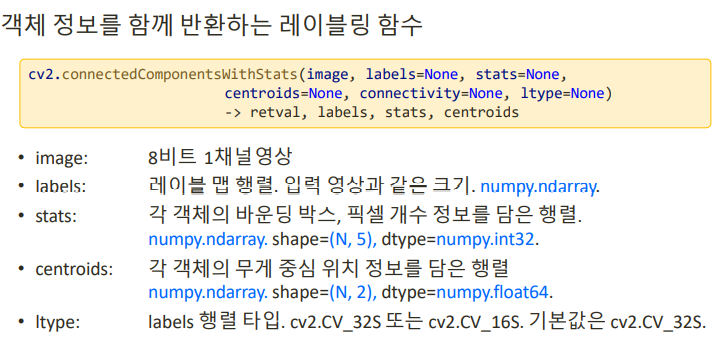

In [ ]:
import sys
import numpy as np
import cv2

In [ ]:
src = cv2.imread('keyboard.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [ ]:
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)

print(stats)

print(centroids)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(1, cnt):
    (x, y, w, h, area) = stats[i]

    if area < 20:
        continue

    cv2.rectangle(dst, (x, y, w, h), (0, 255, 255))

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()